# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [5]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from collections import Counter
import seaborn as sns

# Create a new dataframe from your CSV
df = pd.read_csv('/Users/allisoncannady/Downloads/Rat_Sightings.csv')

In [2]:
# Print out any information you need to understand your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      101914 non-null  int64  
 1   Created Date                    101914 non-null  object 
 2   Closed Date                     90983 non-null   object 
 3   Agency                          101914 non-null  object 
 4   Agency Name                     101914 non-null  object 
 5   Complaint Type                  101914 non-null  object 
 6   Descriptor                      101914 non-null  object 
 7   Location Type                   101908 non-null  object 
 8   Incident Zip                    101578 non-null  float64
 9   Incident Address                92840 non-null   object 
 10  Street Name                     92839 non-null   object 
 11  Cross Street 1                  85257 non-null   object 
 12  Cross Street 2  

In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

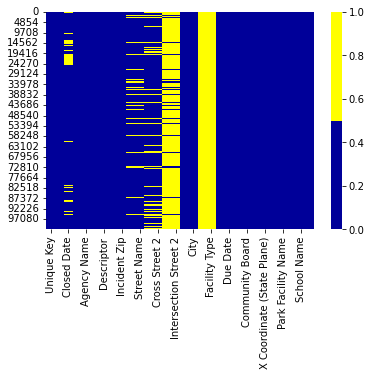

In [6]:
# Plot a heatmap of any missing data
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [7]:
# Try out a missing data percentage list! 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unique Key - 0%
Created Date - 0%
Closed Date - 11%
Agency - 0%
Agency Name - 0%
Complaint Type - 0%
Descriptor - 0%
Location Type - 0%
Incident Zip - 0%
Incident Address - 9%
Street Name - 9%
Cross Street 1 - 16%
Cross Street 2 - 16%
Intersection Street 1 - 91%
Intersection Street 2 - 91%
Address Type - 0%
City - 0%
Landmark - 100%
Facility Type - 100%
Status - 0%
Due Date - 0%
Resolution Action Updated Date - 0%
Community Board - 0%
Borough - 0%
X Coordinate (State Plane) - 1%
Y Coordinate (State Plane) - 1%
Park Facility Name - 0%
Park Borough - 0%
School Name - 0%
School Number - 0%
School Region - 0%
School Code - 0%
School Phone Number - 0%
School Address - 0%
School City - 0%
School State - 0%
School Zip - 0%
School Not Found - 1%
School or Citywide Complaint - 100%
Vehicle Type - 100%
Taxi Company Borough - 100%
Taxi Pick Up Location - 100%
Bridge Highway Name - 100%
Bridge Highway Direction - 100%
Road Ramp - 100%
Bridge Highway Segment - 100%
Garage Lot Name - 100%
Ferry Dire

created missing indicator for: Closed Date
created missing indicator for: Location Type
created missing indicator for: Incident Zip
created missing indicator for: Incident Address
created missing indicator for: Street Name
created missing indicator for: Cross Street 1
created missing indicator for: Cross Street 2
created missing indicator for: Intersection Street 1
created missing indicator for: Intersection Street 2
created missing indicator for: Address Type
created missing indicator for: City
created missing indicator for: Landmark
created missing indicator for: Facility Type
created missing indicator for: Due Date
created missing indicator for: Resolution Action Updated Date
created missing indicator for: X Coordinate (State Plane)
created missing indicator for: Y Coordinate (State Plane)
created missing indicator for: School Not Found
created missing indicator for: School or Citywide Complaint
created missing indicator for: Vehicle Type
created missing indicator for: Taxi Company 

<AxesSubplot:xlabel='index'>

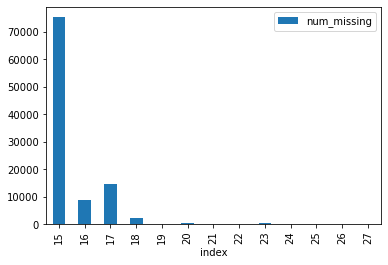

In [8]:
# Plot a missing data histogram
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
  

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [10]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: Incident Zip
imputing missing values for: Facility Type
imputing missing values for: X Coordinate (State Plane)
imputing missing values for: Y Coordinate (State Plane)
imputing missing values for: School or Citywide Complaint
imputing missing values for: Vehicle Type
imputing missing values for: Taxi Company Borough
imputing missing values for: Taxi Pick Up Location
imputing missing values for: Bridge Highway Name
imputing missing values for: Bridge Highway Direction
imputing missing values for: Road Ramp
imputing missing values for: Bridge Highway Segment
imputing missing values for: Garage Lot Name
imputing missing values for: Ferry Direction
imputing missing values for: Ferry Terminal Name
imputing missing values for: Latitude
imputing missing values for: Longitude


In [11]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

imputing missing values for: Closed Date
imputing missing values for: Location Type
imputing missing values for: Incident Address
imputing missing values for: Street Name
imputing missing values for: Cross Street 1
imputing missing values for: Cross Street 2
imputing missing values for: Intersection Street 1
imputing missing values for: Intersection Street 2
imputing missing values for: Address Type
imputing missing values for: City
imputing missing values for: Landmark
imputing missing values for: Due Date
imputing missing values for: Resolution Action Updated Date
imputing missing values for: School Not Found
imputing missing values for: Location


## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

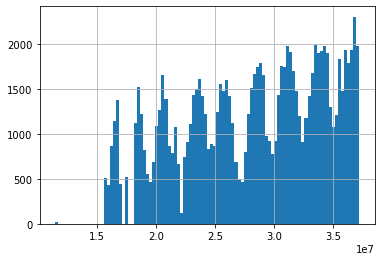

In [14]:
# Plot a histogram to see if there are any outliers.
df['Unique Key'].hist(bins=100)

<AxesSubplot:>

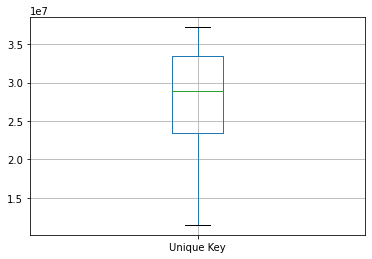

In [15]:
#boxplot
df.boxplot(column=['Unique Key'])

In [17]:
# Use the describe() method
df['Unique Key'].describe()

count    1.019140e+05
mean     2.815864e+07
std      6.015376e+06
min      1.146439e+07
25%      2.341452e+07
50%      2.883680e+07
75%      3.346014e+07
max      3.719700e+07
Name: Unique Key, dtype: float64

<AxesSubplot:>

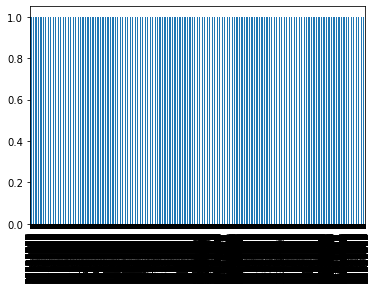

In [19]:
# Plot a bar chart
df['Unique Key'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [10]:
# Handle any outliers in your dataframe

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [22]:
# Look for any irrelevant data in the dataframe. How will you handle it?
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Agency: 100.00000%
DOHMH    101914
Name: Agency, dtype: int64

Agency Name: 100.00000%
Department of Health and Mental Hygiene    101914
Name: Agency Name, dtype: int64

Complaint Type: 100.00000%
Rodent    101914
Name: Complaint Type, dtype: int64

Descriptor: 100.00000%
Rat Sighting    101914
Name: Descriptor, dtype: int64

Landmark: 99.97154%
J F K AIRPORT                      101885
GRAND ARMY PLAZA                        3
WOODHULL MEDICAL CENTER                 3
BARCLAYS CENTER                         2
LA GUARDIA AIRPORT                      2
METROPOLITAN MUSEUM                     2
HUNTER COLLEGE                          2
PENNSYLVANIA STATION                    2
BRYANT PARK                             1
WORLDS FAIR MARINA                      1
LEHMAN COLLEGE                          1
FERRY TERMINAL                          1
BROOKLYN MUSEUM                         1
CITY HALL                               1
BKLYN BATTERY TUNNEL                    1
BKLYN PUBLIC LIBRARY  

In [23]:
# Look for duplicates. How will you handle any duplicates?
df_dedupped = df.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

KeyError: "['id'] not found in axis"

In [ ]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(20)

In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [ ]:
# Try to convert all the strings in a column to lower or upper case. 
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)